# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

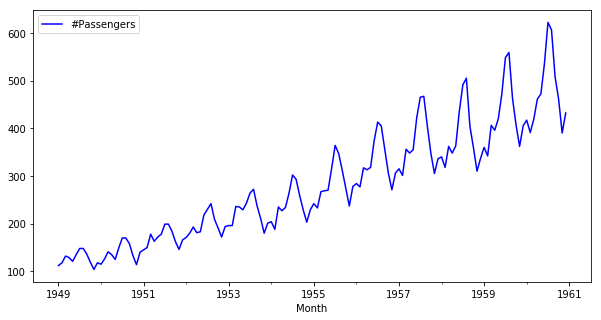

In [22]:
import pandas as pd
from pandas import Series
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

# Import passengers.csv and set it as a time-series object. Plot the TS
data = pd.read_csv('passengers.csv')
ts = data.set_index('Month')
ts.index = pd.to_datetime(ts.index)
ts.plot(figsize=(10,5), color="blue");

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [32]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['#Passengers']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(10,5))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation', fontweight='bold', fontsize=18)
    plt.xlabel('Year', fontweight='bold', fontsize=12)
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

Use your newly created function on the airpassenger data set.

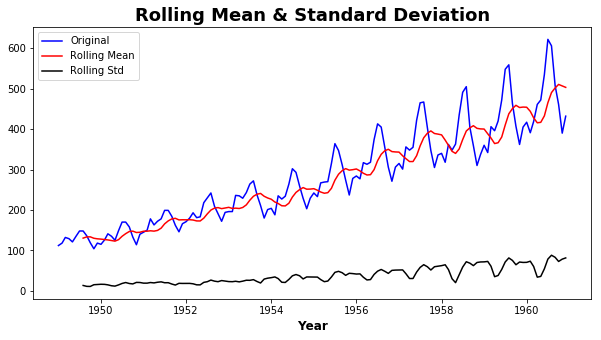

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
stationarity_check(ts)

## Perform a log() and sqrt() transform

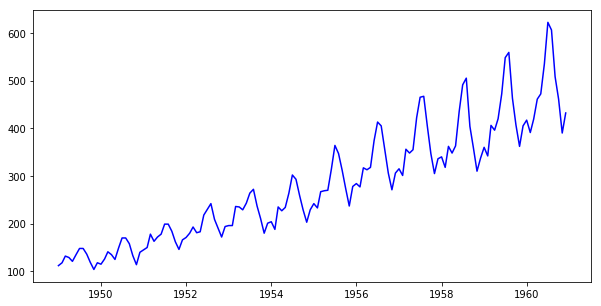

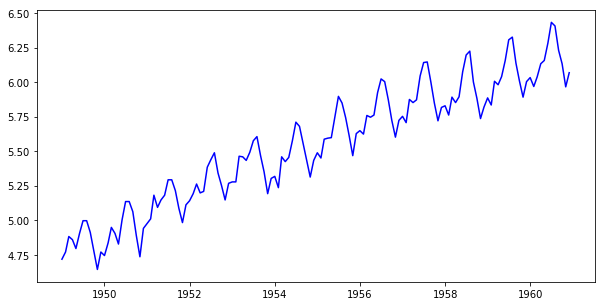

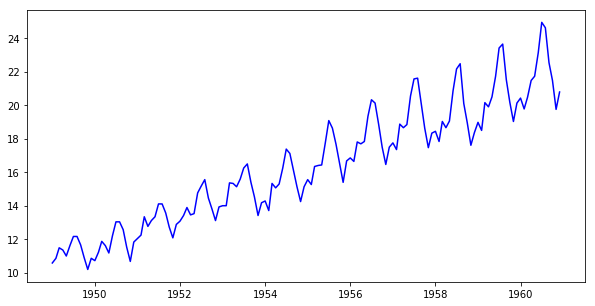

In [19]:
ts_log = np.log(ts)
ts_sqrt= np.sqrt(ts)

fig = plt.figure(figsize=(10,5))
plt.plot(ts,color='blue');
plt.show()

fig = plt.figure(figsize=(10,5))
plt.plot(ts_log, color='blue');
plt.show()

fig = plt.figure(figsize=(10,5))
plt.plot(ts_sqrt, color='blue');

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

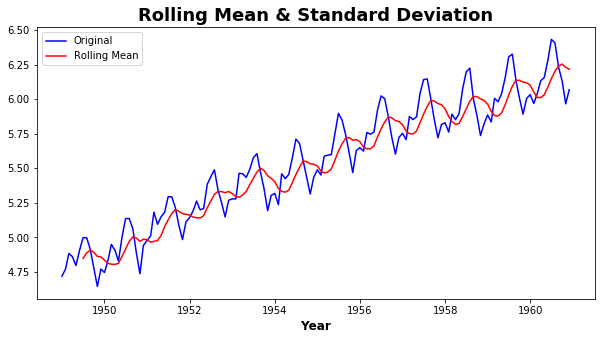

In [29]:
rolling_mean = np.log(ts).rolling(window = 7).mean()
fig = plt.figure(figsize=(10,5))
orig = plt.plot(np.log(ts), color='blue',label='Original')
mean = plt.plot(roling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation', fontweight='bold', fontsize=18)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.show(block=False)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [10]:
# Subtract the moving average from the original data and check head for Nans
data_minus_rolling_mean = np.log(ts) - rolling_mean
data_minus_rolling_mean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [11]:
# Drop the NaN values from timeseries calculated above
data_minus_rolling_mean.dropna(inplace=True)

In [8]:
# Plot the result


Finally, use your function `check_stationarity` to see if this series is considered stationary!

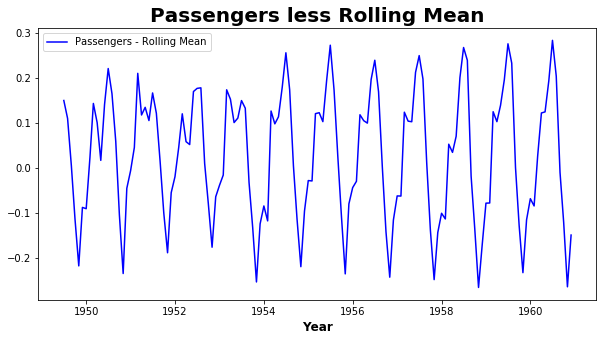

In [16]:
fig = plt.figure(figsize=(10,5))
plt.plot(data_minus_rolling_mean, color='blue',label='Passengers - Rolling Mean')
plt.legend(loc='best')
plt.title('Passengers less Rolling Mean', fontweight='bold', fontsize=20)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.show(block=False)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

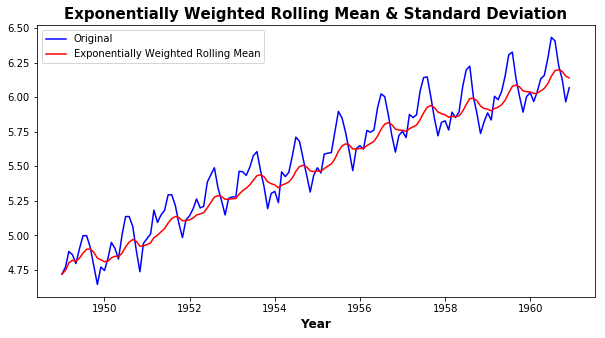

In [26]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolling_mean = np.log(ts).ewm(halflife = 4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(10,5))
orig = plt.plot(np.log(ts), color='blue',label='Original')
mean = plt.plot(exp_rolling_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation', fontweight='bold', fontsize=15)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.show(block=False)

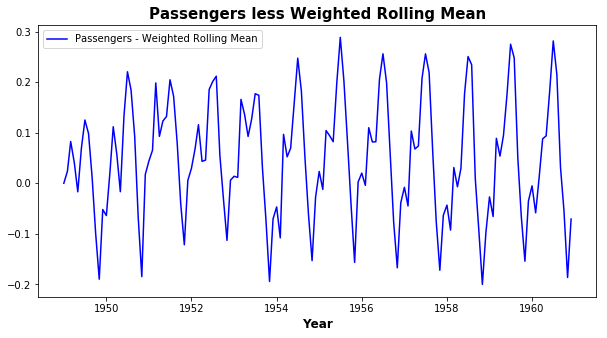

In [36]:
# Subtract the moving average from the original data and plot
data_minus_exp_rolling_mean = np.log(ts) - exp_rolling_mean
data_minus_exp_rolling_mean.head()

fig = plt.figure(figsize=(10,5))
plt.plot(data_minus_exp_rolling_mean, color='blue',label='Passengers - Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Passengers less Weighted Rolling Mean', fontweight='bold', fontsize=15)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.show(block=False)

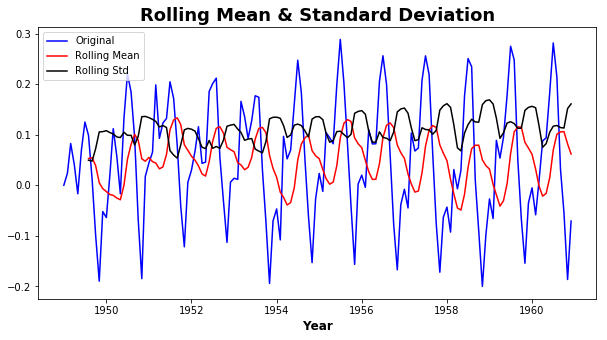

Results of Dickey-Fuller Test:
Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [37]:
# do a stationarity check
stationarity_check(data_minus_exp_rolling_mean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


Based on what I see from the graphs and the results of the DF test, this data is stationary.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [39]:
# difference your data and look at the head
data_diff = data_minus_exp_rolling_mean.diff(periods=12)
data_diff.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


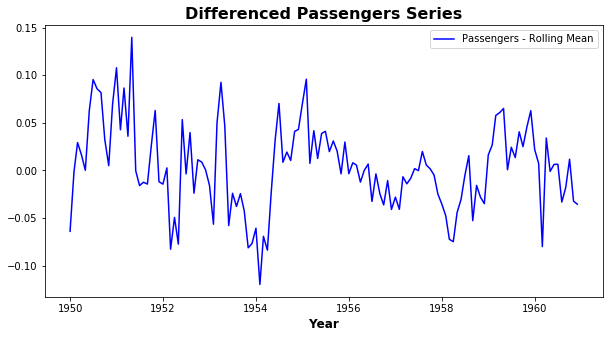

In [42]:
# plot your differenced time series
fig = plt.figure(figsize=(10,5))
plt.plot(data_diff, color='blue', label='Passengers - Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Passengers Series', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.show(block=False)

In [43]:
# drop nas
data_diff.dropna(inplace=True)

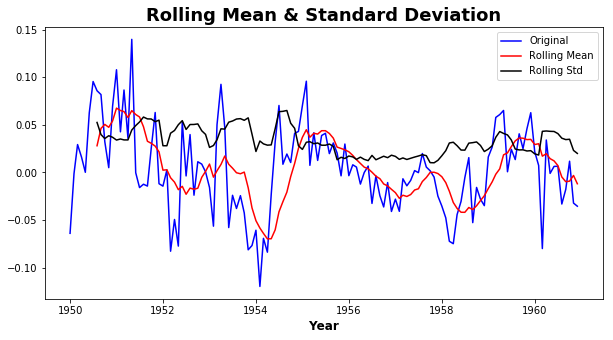

Results of Dickey-Fuller Test:
Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [44]:
# perform the stationarity check
stationarity_check(data_diff)

### Your conclusion

There is significant variance in the Rolling Mean shown above as well as fluctations displayed by the Rolling Standard Deviations. But neither seem to correlate with one another and appear to be random in nature. For this reason, we can move forward with this assumption.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.